### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [3]:
population = pd.read_csv("./data/country_population.csv")
fertility = pd.read_csv("./data/fertility_rate.csv")
life_expectancy = pd.read_csv("./data/life_expectancy.csv")

# pd.DataFrame(population)

### Treat data

In [4]:
unwanted_cols = ["Indicator Name", "Indicator Code", "Country Name"]

population.drop(unwanted_cols, axis=1, inplace=True)
fertility.drop(unwanted_cols, axis=1, inplace=True)
life_expectancy.drop(unwanted_cols, axis=1, inplace=True)

population = population.transpose()
fertility = fertility.transpose()
life_expectancy = life_expectancy.transpose()

years = pd.DataFrame(list(population.index)[1:])

population = pd.concat([years, pd.DataFrame(population.values[1:], columns = population.iloc[0])], axis=1).rename(columns= {0: "year"})
fertility = pd.concat([years, pd.DataFrame(fertility.values[1:], columns = fertility.iloc[0])], axis=1).rename(columns= {0: "year"})
life_expectancy = pd.concat([years, pd.DataFrame(life_expectancy.values[1:], columns = life_expectancy.iloc[0])], axis=1).rename(columns= {0: "year"})

# population
# fertility
# life_expectancy


### Count NaNs and eliminate columns with missing values

In [5]:
vars = [population, fertility, life_expectancy]
strs = ["Population", "Fertility", "Life Expectancy"]

for i in range(3):
    indicator = vars[i]
    for col in indicator:
        if col == "year": continue
        missValues = indicator[col].isna().sum()
        if(missValues >= 1):
            for dst in vars:
                dst.drop(col, axis=1, inplace=True) # delete country in all datasets if missing alot of value in one         
    print("\n")

# print(population)
# print(fertility)
# print(life_expectancy)

### Plot the three variables

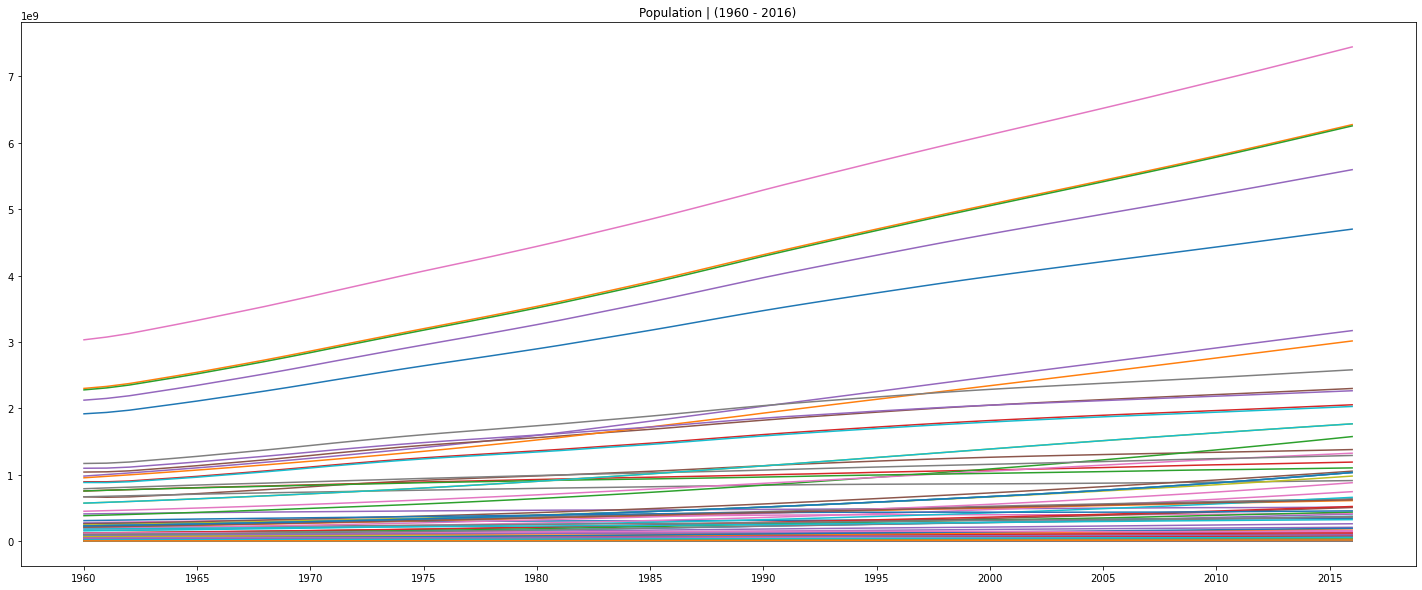

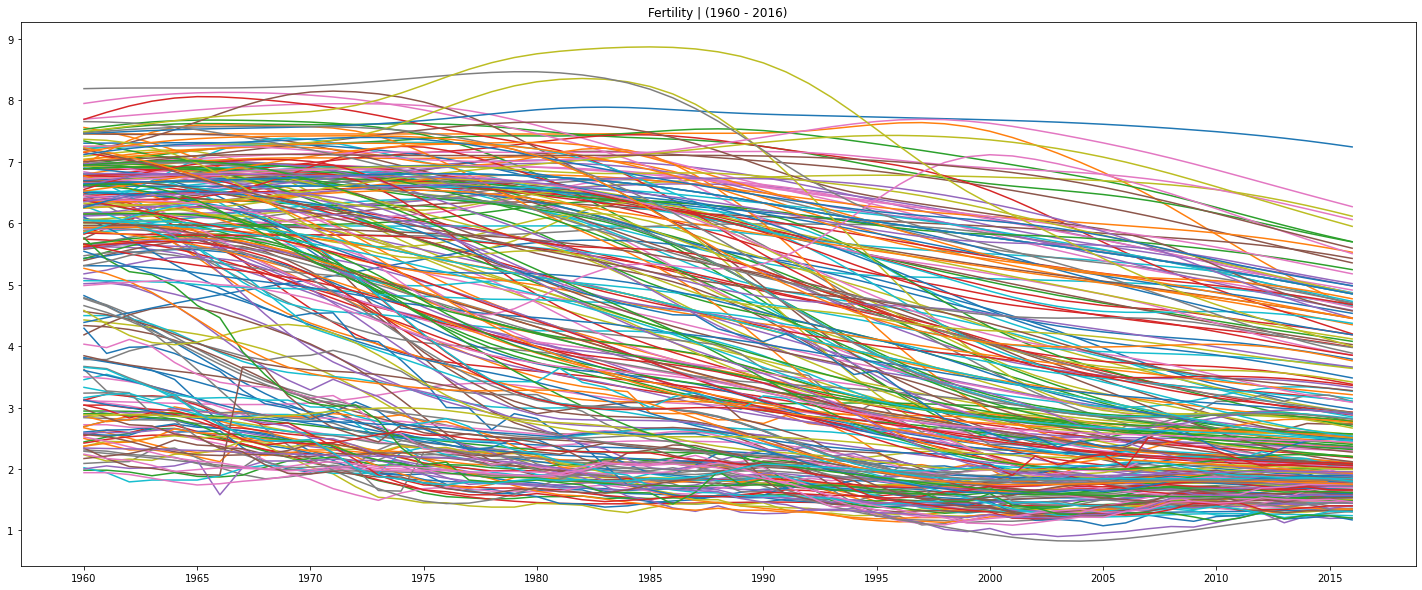

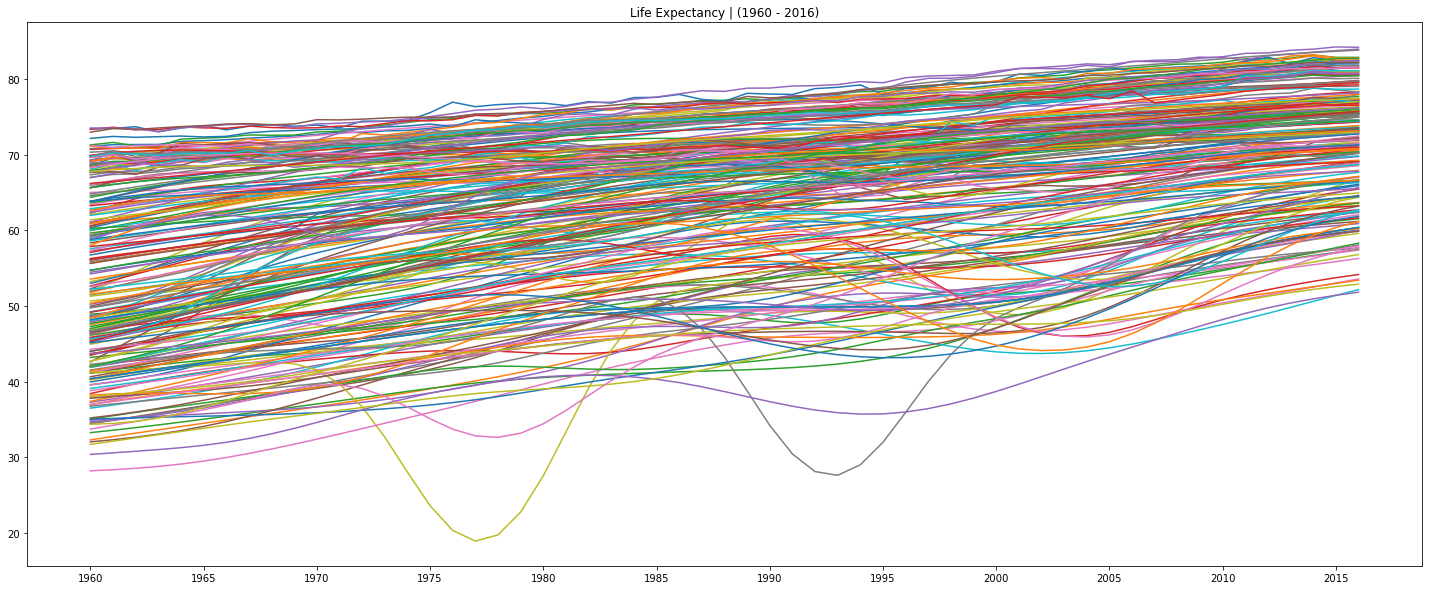

In [6]:
vars = [population, fertility, life_expectancy]
strs = ["Population", "Fertility", "Life Expectancy"]

for i in range(3):
    indicator = vars[i]
    plt.figure(figsize=(25, 10))
    for col in indicator:
        if col != "year":
            plt.plot(indicator["year"], indicator[col])

    plt.title("{} | (1960 - 2016)".format(strs[i]))
    plt.xticks(labels = np.arange(1960, 2016, 5), ticks = np.arange(0, 56, 5))
    plt.show() 

### Join everything in table

In [7]:
data = pd.DataFrame(columns=["Year", "Country", "Population", "Fertility", "Life Expectancy"])

# print(data)

allCont = []
allYears = []
allPopulation = []
allFertility = []
allLifeExpectancy = []

for country in population:
    if country != "year":
        allCont.extend(np.repeat(country, 57))
        allYears.extend(range(1960, 2017))
        allPopulation.extend(population[country])
        allFertility.extend(fertility[country])
        allLifeExpectancy.extend(life_expectancy[country])

data["Country"] = allCont
data["Year"] = allYears
data["Population"] = allPopulation
data["Fertility"] = allFertility
data["Life Expectancy"] = allLifeExpectancy

# Add dumies
data = pd.concat([pd.get_dummies(data["Country"]), data], axis=1)

data

,ABW,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ATG,AUS,...,WSM,YEM,ZAF,ZMB,ZWE,Year,Country,Population,Fertility,Life Expectancy
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1960,ABW,54211.0,4.820,65.662
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1961,ABW,55438.0,4.655,66.074
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1962,ABW,56225.0,4.471,66.444
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1963,ABW,56695.0,4.271,66.787
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1964,ABW,57032.0,4.059,67.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2012,ZWE,14710826.0,3.996,56.516
13220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2013,ZWE,15054506.0,3.957,58.053
13221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2014,ZWE,15411675.0,3.903,59.360
13222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2015,ZWE,15777451.0,3.836,60.398


## Models for Population

### Regression Metrics Function

In [8]:
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error, matthews_corrcoef, max_error, accuracy_score
from scipy.stats import pearsonr


def printRegStatistics(truth, preds):
    corr, pval = pearsonr(truth, preds)
    print("The RVE is: %7.4f" %explained_variance_score(truth, preds))
    print("The RMSE is: %7.4f" %mean_squared_error(truth, preds, squared=False))
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))
    print("The Maximum Error is: %7.4f" %max_error(truth, preds))
    print("The Mean Absolute Error: %7.4f" %mean_absolute_error(truth, preds))

### Split the data

In [11]:
from sklearn.model_selection import train_test_split

X = data.values[:, 0:233]
y = data["Population"].values

X_train_IVS, X_IVS, y_train_IVS, y_IVS = train_test_split(X, y, test_size=0.20, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X_train_IVS, y_train_IVS, test_size=0.20, random_state=7)

### Model 1 - Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

printRegStatistics(y_test, preds)

a = [0, 1]
b = [0] * 230
c = a + b + [20000000000]
preds2 = lr.predict([c])
print(preds2)

The RVE is:  0.9372
The RMSE is: 189947121.0537
The Correlation Score is: 0.9699 (p-value=0.000000e+00)
The Maximum Error is: 2283701351.5002
The Mean Absolute Error: 86279733.2599
[7.78030762e+16]
